In [23]:
import torch

import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import glob

import os

## Necessary code to get the data

In [24]:
class config:
    BASE_PATH = "../input/msc-ai-2022/"
    TRAIN_IMG_PATH = "/kaggle/input/msc-ai-2022/train_images/train_images"
    TRAIN_MASK_PATH = "/kaggle/input/msc-ai-2022/train_masks/train_masks"
    TEST_IMG_PATH = "/kaggle/input/msc-ai-2022/test_images/test_images"

In [25]:
HEIGHT = 256
WIDTH = 256
BATCH_SIZE = 8


# Create a custom Dataset class
class tensorDataset(Dataset):
    def __init__(self, image_paths: list, mask_paths: list, train: bool):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.train = train
        
        self.transform_img = transforms.Compose([
            transforms.Resize([HEIGHT,WIDTH]),
            transforms.ToTensor()
        ])
        self.transform_mask = transforms.Compose([
            transforms.Resize([HEIGHT,WIDTH], interpolation = transforms.InterpolationMode.NEAREST), # Important
            transforms.ToTensor()
        ])
        
    def __getitem__(self, index):
        
        # Select a specific image's path
        img_path  = self.image_paths[index]
        mask_path = self.mask_paths[index]
        
        # Load the image
        img = Image.open(img_path)
        mask = Image.open(mask_path)
    
        # Apply transformations
        img = self.transform_img(img)
        mask = self.transform_mask(mask)
        
        # Scale the mask from 0-1 range to 0-255 range
        mask = mask * 255  
        
        # Reshape mask from (1, H, W) to (H, W) -> This is because loss function accepts (B, H, W) not (B, 1, H, W)
        mask = mask.squeeze(0)
        
        return img, mask

    def __len__(self):
        return len(self.image_paths)

In [26]:
# Very simple train/test split
train_ratio = 0.8
train_set_last_idx = int(len(glob.glob(config.TRAIN_IMG_PATH + "/*")) * train_ratio)

train_img_paths  = sorted(glob.glob(config.TRAIN_IMG_PATH + "/*"))[:train_set_last_idx]
train_mask_paths = sorted(glob.glob(config.TRAIN_MASK_PATH + "/*"))[:train_set_last_idx]
val_img_paths    = sorted(glob.glob(config.TRAIN_IMG_PATH + "/*"))[train_set_last_idx:]
val_mask_paths   = sorted(glob.glob(config.TRAIN_MASK_PATH + "/*"))[train_set_last_idx:]

# Create datasets
train_dataset = tensorDataset(train_img_paths, train_mask_paths, train=True)
val_dataset   = tensorDataset(val_img_paths, val_mask_paths, train=False)

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory = True)
val_dataloader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory = True)

# Resizing the images

## Example of the resizing

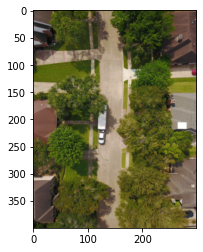

In [27]:
import torchvision.transforms as T

img_paths = sorted(glob.glob(config.TRAIN_IMG_PATH + "/*"))
img_path = img_paths[0]

img = Image.open(img_path)
transform = T.Resize((400,300))
img = transform(img)

f, ax = plt.subplots()
ax.imshow(img)

### Resizing every image to a 400,300 shape

## Creating the folder

In [29]:
from pathlib import Path

destination = Path("/kaggle/working/small_dataset")
#destination.mkdir()
train_dir = Path("/kaggle/working/small_dataset/train_images")
train_dir.mkdir()
test_dir = Path("/kaggle/working/small_dataset/test_images")
test_dir.mkdir()


FileExistsError: [Errno 17] File exists: '/kaggle/working/small_dataset/train_images'

## Trainset

In [ ]:
from pathlib import Path
destination = Path("/kaggle/working/small_dataset")
destination.mkdir()
train_dir = Path("/kaggle/working/small_dataset/train_images")
train_dir.mkdir()

img_paths = sorted(glob.glob(config.TRAIN_IMG_PATH + "/*"))
img_train_paths = [Path(img) for img in img_paths]

for img_path in img_train_paths:
    img = Image.open(str(img_path))
    transform = T.Resize((400,300))
    img = transform(img)
    file_name= img_path.name
    img.save(train_dir / file_name)

## Testset

In [ ]:
img_paths = sorted(glob.glob(config.TRAIN_MASK_PATH + "/*"))
img_test_paths = [Path(img) for img in img_paths]

for img_path in img_test_paths:
    img = Image.open(str(img_path))
    transform = T.Resize((400,300))
    img = transform(img)
    file_name= img_path.name
    img.save(test_dir / file_name)

### Uploading dataset to kaggle

In [37]:
...
# !kaggle datasets create -p /kaggle/working/small_dataset --dir-mode zip

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# Dataset is available [here](https://www.kaggle.com/datasets/adrienloizeau/0feff4fbc0c2233153baa7b6c6c00815)